# Classificação de textos com spaCy

# Etapa 1: Importação e instalação das bibliotecas

In [1]:
!pip install seaborn==0.10.0

     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 215.9/215.9 kB 5.0 MB/s eta 0:00:00
  Attempting uninstall: seaborn
    Found existing installation: seaborn 0.12.2
    Uninstalling seaborn-0.12.2:
      Successfully uninstalled seaborn-0.12.2


In [3]:
import spacy
spacy.__version__

'3.6.1'

In [4]:
# Temporário por problemas no Colab
import locale
def getpreferredencoding(do_setlocale = True):
    return "UTF-8"
locale.getpreferredencoding = getpreferredencoding

In [5]:
!python3 -m spacy download pt

2023-10-06 00:08:39.589250: W tensorflow/compiler/tf2tensorrt/utils/py_utils.cc:38] TF-TRT Warning: Could not find TensorRT
⚠ As of spaCy v3.0, shortcuts like 'pt' are deprecated. Please use the
full pipeline package name 'pt_core_news_sm' instead.
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 13.0/13.0 MB 50.1 MB/s eta 0:00:00
✔ Download and installation successful
You can now load the package via spacy.load('pt_core_news_sm')


In [8]:
import pandas as pd
import string
import spacy
import random
import seaborn as sns
import numpy as np

In [9]:
# para quem for usar o Gdrive
#from google.colab import drive
#drive.mount('/content/drive')

# Etapa 2: Carregamento da base de dados

In [10]:
base_dados = pd.read_csv('/content/base_treinamento.txt', encoding = 'utf-8')

In [11]:
base_dados.shape

(196, 2)

In [12]:
base_dados.head()

,texto,emocao
0,este trabalho é agradável,alegria
1,gosto de ficar no seu aconchego,alegria
2,fiz a adesão ao curso hoje,alegria
3,eu sou admirada por muitos,alegria
4,adoro como você,alegria


In [13]:
base_dados.tail()

,texto,emocao
191,estou chocado e amedrontado com este assassina...,medo
192,é preciso afugenta com ímpeto este medo do inf...,medo
193,políticos usam suas forças para afugentar e am...,medo
194,o objetivo disso e apenas me amedrontar mais,medo
195,isso me apavora,medo


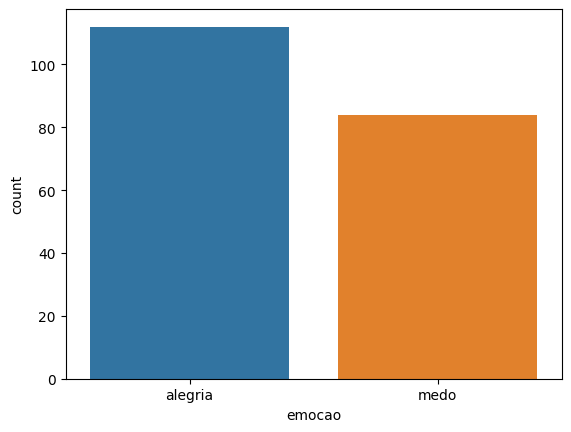

In [14]:
sns.countplot(base_dados['emocao'], label = 'Contagem');

# Etapa 3: Função para pré-processamento dos textos

In [15]:
pontuacoes = string.punctuation
pontuacoes

'!"#$%&\'()*+,-./:;<=>?@[\\]^_`{|}~'

In [16]:
from spacy.lang.pt.stop_words import STOP_WORDS
stop_words = STOP_WORDS

In [17]:
print(stop_words)

{'tanto', 'sobre', 'possível', 'nosso', 'eles', 'daquela', 'sete', 'veja', 'depois', 'meu', 'ambas', 'estive', 'desta', 'tiveram', 'algo', 'lado', 'foi', 'lhe', 'tem', 'estivemos', 'fará', 'sexta', 'desde', 'for', 'porque', 'ligado', 'vocês', 'des', 'saber', 'ao', 'só', 'cima', 'esses', 'corrente', 'nuns', 'qual', 'comprido', 'alguns', 'é', 'poder', 'momento', 'deste', 'dizer', 'ora', 'não', 'estiveram', 'meio', 'sei', 'tempo', 'vários', 'esteve', 'fazia', 'favor', 'daquele', 'terceiro', 'umas', 'mesmo', 'contudo', 'onze', 'mês', 'apoio', 'ontem', 'mal', 'estão', 'ele', 'fim', 'cá', 'essas', 'debaixo', 'sua', 'toda', 'talvez', 'dão', 'quinze', 'poderá', 'das', 'ela', 'dar', 'primeiro', 'grupo', 'pela', 'demais', 'à', 'contra', 'apenas', 'quinto', 'vosso', 'os', 'disso', 'seus', 'cedo', 'nesta', 'dezoito', 'tudo', 'mil', 'nível', 'estes', 'tentaram', 'nenhuma', 'apontar', 'nesse', 'outras', 'qualquer', 'dizem', 'quais', 'se', 'isto', 'pelas', 'relação', 'muito', 'por', 'tens', 'iniciar'

In [18]:
len(stop_words)

416

In [19]:
#pln = spacy.load('pt')
pln = spacy.load('pt_core_news_sm')

In [20]:
pln

In [21]:
def preprocessamento(texto):
  texto = texto.lower()
  documento = pln(texto)

  lista = []
  for token in documento:
    #lista.append(token.text)
    lista.append(token.lemma_)

  lista = [palavra for palavra in lista if palavra not in stop_words and palavra not in pontuacoes]
  lista = ' '.join([str(elemento) for elemento in lista if not elemento.isdigit()])

  return lista

In [25]:
teste = preprocessamento('Estou aPrendendo 1 10 23 processamento de linguagem natural, Curso em Fatec')
teste

'aprender processamento linguagem natural curso fatec'

# Etapa 4: Pré-processamento da base de dados

### Limpeza dos textos

In [27]:
base_dados.head(10)

,texto,emocao
0,este trabalho é agradável,alegria
1,gosto de ficar no seu aconchego,alegria
2,fiz a adesão ao curso hoje,alegria
3,eu sou admirada por muitos,alegria
4,adoro como você,alegria
5,adoro seu cabelo macio,alegria
6,adoro a cor dos seus olhos,alegria
7,somo tão amáveis um com o outro,alegria
8,sinto uma grande afeição por ele,alegria
9,quero agradar meus filhos,alegria


In [28]:
base_dados['texto'] = base_dados['texto'].apply(preprocessamento)

In [30]:
base_dados.head(10)

,texto,emocao
0,trabalho agradável,alegria
1,gosto ficar em o aconchego,alegria
2,fiz adesão a o curso hoje,alegria
3,admirar,alegria
4,adorar,alegria
5,adorar cabelo macio,alegria
6,adorar cor de o olho,alegria
7,somo amável outro,alegria
8,sinto afeição,alegria
9,querer agradar filho,alegria


### Tratamento da classe

In [31]:
exemplo_base_dados = [["este trabalho é agradável", {"ALEGRIA": True, "MEDO": False}],
                      ["este lugar continua assustador", {"ALEGRIA": False, "MEDO": True}]]

In [32]:
type(exemplo_base_dados)

list

In [33]:
exemplo_base_dados[0]

['este trabalho é agradável', {'ALEGRIA': True, 'MEDO': False}]

In [34]:
exemplo_base_dados[0][0]

'este trabalho é agradável'

In [35]:
exemplo_base_dados[0][1]

{'ALEGRIA': True, 'MEDO': False}

In [36]:
type(exemplo_base_dados[0][1])

dict

In [39]:
#base_dados.shape
base_dados.head()

,texto,emocao
0,trabalho agradável,alegria
1,gosto ficar em o aconchego,alegria
2,fiz adesão a o curso hoje,alegria
3,admirar,alegria
4,adorar,alegria


In [40]:
base_dados_final = []
for texto, emocao in zip(base_dados['texto'], base_dados['emocao']):
  #print(texto, emocao)
  if emocao == 'alegria':
    dic = ({'ALEGRIA': True, 'MEDO': False})
  elif emocao == 'medo':
    dic = ({'ALEGRIA': False, 'MEDO': True})

  base_dados_final.append([texto, dic.copy()])

In [41]:
len(base_dados_final)

196

In [42]:
base_dados_final[0]

['trabalho agradável', {'ALEGRIA': True, 'MEDO': False}]

In [43]:
base_dados_final[0][0]

'trabalho agradável'

In [44]:
base_dados_final[0][1]

{'ALEGRIA': True, 'MEDO': False}

In [ ]:
type(base_dados_final[0][1])

dict

In [ ]:
base_dados_final

[['trabalho agradável', {'ALEGRIA': True, 'MEDO': False}],
 ['gosto ficar em o aconchego', {'ALEGRIA': True, 'MEDO': False}],
 ['fiz adesão a o curso hoje', {'ALEGRIA': True, 'MEDO': False}],
 ['admirar', {'ALEGRIA': True, 'MEDO': False}],
 ['adorar', {'ALEGRIA': True, 'MEDO': False}],
 ['adorar cabelo macio', {'ALEGRIA': True, 'MEDO': False}],
 ['adorar cor de o olho', {'ALEGRIA': True, 'MEDO': False}],
 ['somo amável outro', {'ALEGRIA': True, 'MEDO': False}],
 ['sinto afeição', {'ALEGRIA': True, 'MEDO': False}],
 ['querer agradar filho', {'ALEGRIA': True, 'MEDO': False}],
 ['sinto completamente amar', {'ALEGRIA': True, 'MEDO': False}],
 ['amo', {'ALEGRIA': True, 'MEDO': False}],
 ['alívio', {'ALEGRIA': True, 'MEDO': False}],
 ['dor amenizar finalmente', {'ALEGRIA': True, 'MEDO': False}],
 ['achar apaixoneir', {'ALEGRIA': True, 'MEDO': False}],
 ['amar maravilhoso', {'ALEGRIA': True, 'MEDO': False}],
 ['sentir animar', {'ALEGRIA': True, 'MEDO': False}],
 ['sintar hoje', {'ALEGRIA': Tr

# Etapa 5: Criação do classificador

In [ ]:
from spacy.training import Example

In [ ]:
modelo = spacy.blank('pt')
textcat = modelo.add_pipe("textcat")
textcat.add_label("ALEGRIA")
textcat.add_label("MEDO")
historico = []

In [ ]:
modelo.begin_training()
for epoca in range(1000):
  random.shuffle(base_dados_final)
  losses = {}
  for batch in spacy.util.minibatch(base_dados_final, 30):
    textos = [modelo(texto) for texto, entities in batch]
    annotations = [{'cats': entities} for texto, entities in batch]
    examples = [Example.from_dict(doc, annotation) for doc, annotation in zip(
            textos, annotations
        )]
    modelo.update(examples, losses=losses)
  if epoca % 100 == 0:
    print(losses)
    historico.append(losses)

{'textcat': 1.7383189052343369}
{'textcat': 4.693683907253804e-11}
{'textcat': 6.7519104998865764e-12}
{'textcat': 1.736360126590019e-12}
{'textcat': 5.533659756139968e-13}
{'textcat': 2.2890051755219487e-13}
{'textcat': 1.212880082640148e-13}
{'textcat': 5.230208241904842e-14}
{'textcat': 2.495896748538174e-14}
{'textcat': 1.2465822848257112e-14}


In [ ]:
historico_loss = []
for i in historico:
  historico_loss.append(i.get('textcat'))

In [ ]:
historico_loss = np.array(historico_loss)
historico_loss

array([1.73831891e+00, 4.69368391e-11, 6.75191050e-12, 1.73636013e-12,
       5.53365976e-13, 2.28900518e-13, 1.21288008e-13, 5.23020824e-14,
       2.49589675e-14, 1.24658228e-14])

Text(0, 0.5, 'Erro')

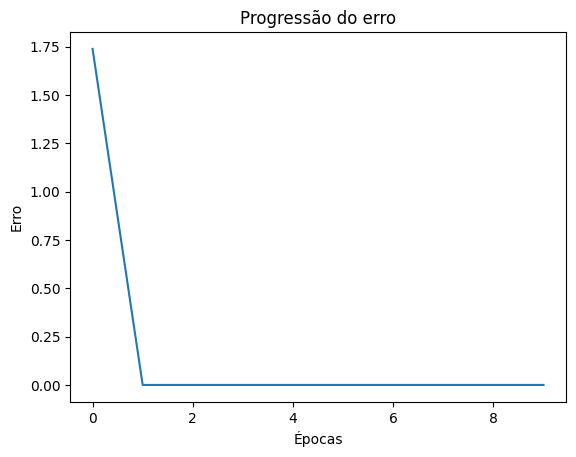

In [ ]:
import matplotlib.pyplot as plt
plt.plot(historico_loss)
plt.title('Progressão do erro')
plt.xlabel('Épocas')
plt.ylabel('Erro')

In [ ]:
modelo.to_disk("modelo")

# Etapa 6: Testes com uma frase

In [ ]:
modelo_carregado = spacy.load("modelo")
modelo_carregado

In [ ]:
texto_positivo = 'eu adoro cor dos seus olhos'

In [ ]:
texto_positivo = preprocessamento(texto_positivo)
texto_positivo

'adorar cor de o olho'

In [ ]:
previsao = modelo_carregado(texto_positivo)
previsao

adorar cor de o olho

In [ ]:
previsao.cats

{'ALEGRIA': 1.0, 'MEDO': 3.511161494884618e-08}

In [ ]:
texto_negativo = 'estou com medo dele'
previsao = modelo_carregado(preprocessamento(texto_negativo))
previsao.cats

{'ALEGRIA': 3.624314786065952e-07, 'MEDO': 0.9999996423721313}

# Etapa 7: Avaliação do modelo

## Avaliação na base de treinamento


In [ ]:
previsoes = []
for texto in base_dados['texto']:
  #print(texto)
  previsao = modelo_carregado(texto)
  previsoes.append(previsao.cats)

In [ ]:
previsoes

[{'ALEGRIA': 1.0, 'MEDO': 1.1149378309482927e-08},
 {'ALEGRIA': 1.0, 'MEDO': 9.178648952001822e-09},
 {'ALEGRIA': 1.0, 'MEDO': 1.2666282245277216e-08},
 {'ALEGRIA': 1.0, 'MEDO': 4.597235658820864e-08},
 {'ALEGRIA': 1.0, 'MEDO': 1.6763207710823735e-08},
 {'ALEGRIA': 1.0, 'MEDO': 2.7533204161045433e-08},
 {'ALEGRIA': 1.0, 'MEDO': 3.511161494884618e-08},
 {'ALEGRIA': 1.0, 'MEDO': 4.5298051531972305e-08},
 {'ALEGRIA': 1.0, 'MEDO': 1.5864758395878198e-08},
 {'ALEGRIA': 0.9999998807907104, 'MEDO': 6.197877411295849e-08},
 {'ALEGRIA': 1.0, 'MEDO': 1.1471222194359143e-08},
 {'ALEGRIA': 1.0, 'MEDO': 3.093333589276881e-08},
 {'ALEGRIA': 1.0, 'MEDO': 4.053408719784102e-09},
 {'ALEGRIA': 1.0, 'MEDO': 9.578424275957786e-09},
 {'ALEGRIA': 1.0, 'MEDO': 4.816998000478634e-08},
 {'ALEGRIA': 1.0, 'MEDO': 1.1574429414906717e-08},
 {'ALEGRIA': 1.0, 'MEDO': 1.518809078504546e-08},
 {'ALEGRIA': 1.0, 'MEDO': 6.951439424085493e-09},
 {'ALEGRIA': 1.0, 'MEDO': 1.4185888019824233e-08},
 {'ALEGRIA': 1.0, 'MEDO': 

In [ ]:
previsoes_final = []
for previsao in previsoes:
  if previsao['ALEGRIA'] > previsao['MEDO']:
    previsoes_final.append('alegria')
  else:
    previsoes_final.append('medo')

previsoes_final = np.array(previsoes_final)

In [ ]:
previsoes_final

array(['alegria', 'alegria', 'alegria', 'alegria', 'alegria', 'alegria',
       'alegria', 'alegria', 'alegria', 'alegria', 'alegria', 'alegria',
       'alegria', 'alegria', 'alegria', 'alegria', 'alegria', 'alegria',
       'alegria', 'alegria', 'alegria', 'alegria', 'alegria', 'alegria',
       'alegria', 'alegria', 'alegria', 'alegria', 'alegria', 'alegria',
       'alegria', 'alegria', 'alegria', 'alegria', 'alegria', 'alegria',
       'alegria', 'alegria', 'alegria', 'alegria', 'alegria', 'alegria',
       'alegria', 'alegria', 'alegria', 'alegria', 'alegria', 'alegria',
       'alegria', 'alegria', 'alegria', 'alegria', 'alegria', 'alegria',
       'alegria', 'alegria', 'alegria', 'alegria', 'alegria', 'alegria',
       'alegria', 'alegria', 'alegria', 'alegria', 'alegria', 'alegria',
       'alegria', 'alegria', 'alegria', 'alegria', 'alegria', 'alegria',
       'alegria', 'alegria', 'alegria', 'alegria', 'alegria', 'alegria',
       'alegria', 'alegria', 'alegria', 'alegria', 

In [ ]:
respostas_reais = base_dados['emocao'].values
respostas_reais

array(['alegria', 'alegria', 'alegria', 'alegria', 'alegria', 'alegria',
       'alegria', 'alegria', 'alegria', 'alegria', 'alegria', 'alegria',
       'alegria', 'alegria', 'alegria', 'alegria', 'alegria', 'alegria',
       'alegria', 'alegria', 'alegria', 'alegria', 'alegria', 'alegria',
       'alegria', 'alegria', 'alegria', 'alegria', 'alegria', 'alegria',
       'alegria', 'alegria', 'alegria', 'alegria', 'alegria', 'alegria',
       'alegria', 'alegria', 'alegria', 'alegria', 'alegria', 'alegria',
       'alegria', 'alegria', 'alegria', 'alegria', 'alegria', 'alegria',
       'alegria', 'alegria', 'alegria', 'alegria', 'alegria', 'alegria',
       'alegria', 'alegria', 'alegria', 'alegria', 'alegria', 'alegria',
       'alegria', 'alegria', 'alegria', 'alegria', 'alegria', 'alegria',
       'alegria', 'alegria', 'alegria', 'alegria', 'alegria', 'alegria',
       'alegria', 'alegria', 'alegria', 'alegria', 'alegria', 'alegria',
       'alegria', 'alegria', 'alegria', 'alegria', 

In [ ]:
from sklearn.metrics import confusion_matrix, accuracy_score
accuracy_score(respostas_reais, previsoes_final)

1.0

In [ ]:
cm = confusion_matrix(respostas_reais, previsoes_final)
cm

array([[112,   0],
       [  0,  84]])

## Avaliação na base de teste

In [ ]:
base_dados_teste = pd.read_csv('/content/base_teste.txt', encoding = 'utf-8')

In [ ]:
base_dados_teste.head()

,texto,emocao
0,não precisei pagar o ingresso,alegria
1,se eu ajeitar tudo fica bem,alegria
2,minha fortuna ultrapassará a sua,alegria
3,sou muito afortunado,alegria
4,é benéfico para todos esta nova medida,alegria


In [ ]:
base_dados_teste['texto'] = base_dados_teste['texto'].apply(preprocessamento)

In [ ]:
base_dados_teste.head()

,texto,emocao
0,precisar pagar ingresso,alegria
1,ajeitar ficar,alegria
2,fortuna ultrapassar,alegria
3,afortunar,alegria
4,benéfico medida,alegria


In [ ]:
previsoes = []
for texto in base_dados_teste['texto']:
  #print(texto)
  previsao = modelo_carregado(texto)
  previsoes.append(previsao.cats)

In [ ]:
previsoes_final = []
for previsao in previsoes:
  if previsao['ALEGRIA'] > previsao['MEDO']:
    previsoes_final.append('alegria')
  else:
    previsoes_final.append('medo')

previsoes_final = np.array(previsoes_final)

In [ ]:
respostas_reais = base_dados_teste['emocao'].values

In [ ]:
accuracy_score(respostas_reais, previsoes_final)

0.5476190476190477

In [ ]:
cm = confusion_matrix(respostas_reais, previsoes_final)
cm

array([[31, 17],
       [21, 15]])